<a href="https://colab.research.google.com/github/singhkaran202/Sentimental-Analysis-using-Neural-Network/blob/main/Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
movie_reviews=pd.read_csv('/content/gdrive/MyDrive/IMDB_Dataset_1400.csv')
movie_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
movie_reviews["review"][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

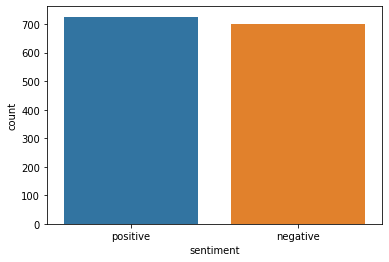

In [ ]:
import seaborn as sns
sns.countplot(x='sentiment', data=movie_reviews)

In [ ]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [ ]:
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [ ]:
X[3]

'Basically there a family where little boy Jake thinks there a zombie in his closet his parents are fighting all the time This movie is slower than soap opera and suddenly Jake decides to become Rambo and kill the zombie OK first of all when you re going to make film you must Decide if its thriller or drama As drama the movie is watchable Parents are divorcing arguing like in real life And then we have Jake with his closet which totally ruins all the film expected to see BOOGEYMAN similar movie and instead watched drama with some meaningless thriller spots out of just for the well playing parents descent dialogs As for the shots with Jake just ignore them '

In [ ]:
y = movie_reviews['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

NameError: ignored

In [ ]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/content/gdrive/MyDrive/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
from keras.layers import Embedding, Flatten
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 100)          1846400   
                                                                 
 flatten_2 (Flatten)         (None, 10000)             0         
                                                                 
 dense_4 (Dense)             (None, 1)                 10001     
                                                                 
Total params: 1,856,401
Trainable params: 10,001
Non-trainable params: 1,846,400
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=100, verbose=2, validation_split=0.2)

In [ ]:
score = model.evaluate(X_test, y_test, verbose=2)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

9/9 - 0s - loss: 0.8578 - acc: 0.6105 - 31ms/epoch - 3ms/step
Test Score: 0.8577762842178345
Test Accuracy: 0.6105263233184814


In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=100, verbose=2, validation_split=0.2, validation_data=(X_test, y_test))

Epoch 1/100
8/8 - 1s - loss: 0.7810 - acc: 0.5318 - val_loss: 0.7214 - val_acc: 0.5658 - 806ms/epoch - 101ms/step
Epoch 2/100
8/8 - 0s - loss: 0.6145 - acc: 0.6469 - val_loss: 0.6540 - val_acc: 0.6272 - 78ms/epoch - 10ms/step
Epoch 3/100
8/8 - 0s - loss: 0.5169 - acc: 0.7697 - val_loss: 0.6484 - val_acc: 0.6623 - 82ms/epoch - 10ms/step
Epoch 4/100
8/8 - 0s - loss: 0.4428 - acc: 0.8498 - val_loss: 0.6504 - val_acc: 0.6184 - 102ms/epoch - 13ms/step
Epoch 5/100
8/8 - 0s - loss: 0.4075 - acc: 0.8542 - val_loss: 0.7300 - val_acc: 0.5614 - 92ms/epoch - 11ms/step
Epoch 6/100
8/8 - 0s - loss: 0.3664 - acc: 0.8761 - val_loss: 0.6378 - val_acc: 0.6360 - 104ms/epoch - 13ms/step
Epoch 7/100
8/8 - 0s - loss: 0.3135 - acc: 0.9485 - val_loss: 0.6412 - val_acc: 0.6360 - 79ms/epoch - 10ms/step
Epoch 8/100
8/8 - 0s - loss: 0.2843 - acc: 0.9507 - val_loss: 0.6673 - val_acc: 0.6404 - 58ms/epoch - 7ms/step
Epoch 9/100
8/8 - 0s - loss: 0.2504 - acc: 0.9770 - val_loss: 0.6424 - val_acc: 0.6623 - 57ms/epoch -

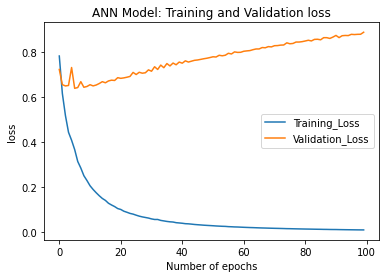

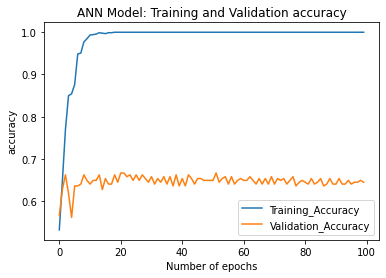

In [ ]:
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'acc': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_acc': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('ANN Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
# Plot
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

NameError: ignored

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score (y_test,y_pred )

0.5929824561403508

**Text Classification with a Recurrent Neural Network**

In [ ]:
from keras.layers import GlobalMaxPooling1D, Conv1D

model = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
print(model.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 100, 100)          1846400   
                                                                 
 conv1d_4 (Conv1D)           (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,910,657
Trainable params: 64,257
Non-trainable params: 1,846,400
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=100, verbose=2, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=2)

Epoch 1/100
8/8 - 2s - loss: 0.7234 - acc: 0.5197 - val_loss: 0.6999 - val_acc: 0.5307 - 2s/epoch - 259ms/step
Epoch 2/100
8/8 - 1s - loss: 0.6053 - acc: 0.6327 - val_loss: 0.6331 - val_acc: 0.6535 - 1s/epoch - 151ms/step
Epoch 3/100
8/8 - 1s - loss: 0.5377 - acc: 0.8015 - val_loss: 0.6335 - val_acc: 0.6360 - 1s/epoch - 159ms/step
Epoch 4/100
8/8 - 1s - loss: 0.4839 - acc: 0.8695 - val_loss: 0.6063 - val_acc: 0.6754 - 779ms/epoch - 97ms/step
Epoch 5/100
8/8 - 1s - loss: 0.4444 - acc: 0.8936 - val_loss: 0.5994 - val_acc: 0.6667 - 653ms/epoch - 82ms/step
Epoch 6/100
8/8 - 1s - loss: 0.4104 - acc: 0.9430 - val_loss: 0.5800 - val_acc: 0.7149 - 651ms/epoch - 81ms/step
Epoch 7/100
8/8 - 1s - loss: 0.3716 - acc: 0.9682 - val_loss: 0.5952 - val_acc: 0.6798 - 637ms/epoch - 80ms/step
Epoch 8/100
8/8 - 1s - loss: 0.3579 - acc: 0.9276 - val_loss: 0.5690 - val_acc: 0.6974 - 654ms/epoch - 82ms/step
Epoch 9/100
8/8 - 1s - loss: 0.3230 - acc: 0.9627 - val_loss: 0.5585 - val_acc: 0.7105 - 663ms/epoch -

In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.5023395419120789
Test Accuracy: 0.800000011920929


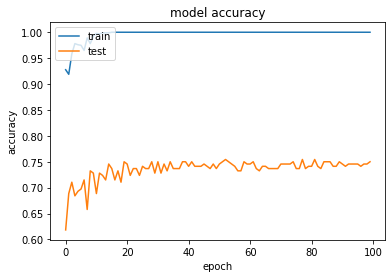

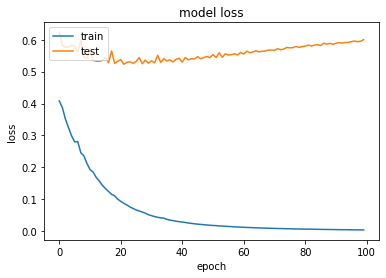

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[115,  26],
       [ 31, 113]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score (y_test,y_pred )

0.8

**Text Classification with Recurrent Neural Network (LSTM)**

In [ ]:
from keras.layers import LSTM

model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
print(model.summary())

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 100, 100)          1846400   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,963,777
Trainable params: 117,377
Non-trainable params: 1,846,400
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=100, verbose=2, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=2)

Epoch 1/100
8/8 - 6s - loss: 0.6959 - acc: 0.5252 - val_loss: 0.7071 - val_acc: 0.4868 - 6s/epoch - 758ms/step
Epoch 2/100
8/8 - 3s - loss: 0.6701 - acc: 0.5910 - val_loss: 0.6796 - val_acc: 0.5570 - 3s/epoch - 325ms/step
Epoch 3/100
8/8 - 3s - loss: 0.6550 - acc: 0.6623 - val_loss: 0.6823 - val_acc: 0.5614 - 3s/epoch - 333ms/step
Epoch 4/100
8/8 - 3s - loss: 0.6473 - acc: 0.6316 - val_loss: 0.6730 - val_acc: 0.5789 - 3s/epoch - 334ms/step
Epoch 5/100
8/8 - 3s - loss: 0.6175 - acc: 0.6853 - val_loss: 0.6494 - val_acc: 0.6360 - 3s/epoch - 334ms/step
Epoch 6/100
8/8 - 3s - loss: 0.5845 - acc: 0.6985 - val_loss: 0.8289 - val_acc: 0.5351 - 3s/epoch - 326ms/step
Epoch 7/100
8/8 - 3s - loss: 0.6080 - acc: 0.6557 - val_loss: 0.6678 - val_acc: 0.5965 - 3s/epoch - 322ms/step
Epoch 8/100
8/8 - 3s - loss: 0.5860 - acc: 0.7029 - val_loss: 0.6583 - val_acc: 0.5833 - 3s/epoch - 351ms/step
Epoch 9/100
8/8 - 3s - loss: 0.5548 - acc: 0.7094 - val_loss: 0.6865 - val_acc: 0.5789 - 3s/epoch - 332ms/step
E

In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 1.0264098644256592
Test Accuracy: 0.7368420958518982


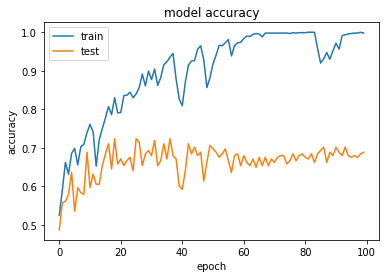

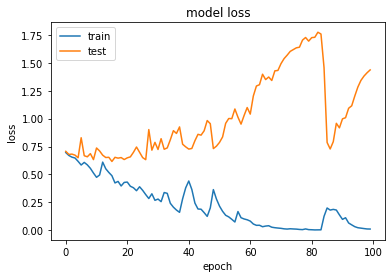

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[102,  39],
       [ 36, 108]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score (y_test,y_pred )

0.7368421052631579